Question: When viewing state-specific data, is there a correlation between the percentage of the population that has attained a B.A. and the percentage of the population that has received the Pfizer COVID vaccination.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
"""First dataframe: Pfizer COVID vaccination allocations per state and week. I am working under the assumption that the 
doses allocated will roughly align with demand over time. I am also ignoring 2nd dose allocations because I am only 
interested in how many individuals are fully (Pfizer) vaccinated."""

covid_pfi_vax = pd.read_csv('C:/Users/Danielle/Desktop/covid_vax.csv')
#source: https://data.cdc.gov/Vaccinations/COVID-19-Vaccine-Distribution-Allocations-by-Juris/saz5-9hgg

covid_pfi_vax #sanity check

,Jurisdiction,Week of Allocations,1st Dose Allocations,2nd Dose Allocations
0,Connecticut,5/10/2021,"54,990","54,990"
1,Maine,5/10/2021,"21,060","21,060"
2,Massachusetts,5/10/2021,"105,300","105,300"
3,New Hampshire,5/10/2021,"21,060","21,060"
4,Rhode Island,5/10/2021,"16,380","16,380"
...,...,...,...,...
1381,Virginia,12/14/2020,"72,150","72,150"
1382,Washington,12/14/2020,"62,400","62,400"
1383,West Virginia,12/14/2020,"16,575","16,575"
1384,Wisconsin,12/14/2020,"49,725","49,725"


In [3]:
covid_pfi_vax.columns = ['State', 'Week of Allocations', 'Dose Allocations', '2nd Dose Allocations']
#Renamed 'Jurisdiction' to 'State' to allow for later merge.

covid_pfi_vax.sort_values(by=['State'], inplace=True, ascending=True)
#sorted states by alphabetical order 

covid_pfi_vax = covid_pfi_vax[['State', 'Week of Allocations', 'Dose Allocations']]
"""Cleaning data: I eliminated the final column as it is redundant since I am only interested in numbers of fully vaccinated
individuals"""

jurisdictions = ['American Samoa', 'Guam', 'Marshall Islands', 'Micronesia', 'Mariana Islands', 'Palau', 'Federal Entities', 'Puerto Rico']
covid_pfi_vax = covid_pfi_vax[~covid_pfi_vax.State.isin(jurisdictions)]
"""Cleaning data: I realize that inner merge, which I will use later, will eliminate some of these terrirories, but doing it
this this way feels than backtracking later."""

covid_pfi_vax['Dose Allocations'] = covid_pfi_vax['Dose Allocations'].str.replace(',', '').astype(float)
#cleaning data: converting string to float for later calculations


covid_pfi_vax = covid_pfi_vax.groupby(['State']).sum()
"""cleaning/organizing data: It will be too cumbersome later on to look at 1,386 rows. I really just want to look at
comparative totals over the same time period, so I am summing dose allocations by state."""

covid_pfi_vax.head() #sanity check

,Dose Allocations
State,
Alabama,1119300.0
Alaska,269880.0
Arizona,1587300.0
Arkansas,684840.0
California,8879520.0


In [16]:
"""Second Dataframe: Moderna COVID vaccination allocations per state and week. I am working under the assumption that the 
doses allocated will roughly align with demand over time. I am also ignoring 2nd dose allocations because I am only 
interested in how many individuals are fully (Pfizer) vaccinated."""

covid_mrna_vax = pd.read_csv('C:/Users/Danielle/Desktop/COVID-19_Vaccine_Distribution_Allocations_by_Jurisdiction_-_Moderna.csv')
#source: https://data.cdc.gov/Vaccinations/COVID-19-Vaccine-Distribution-Allocations-by-Juris/b7pe-5nws

covid_mrna_vax #sanity check

,Jurisdiction,Week of Allocations,1st Dose Allocations,2nd Dose Allocations
0,Connecticut,5/10/2021,"41,300","41,300"
1,Maine,5/10/2021,"15,800","15,800"
2,Massachusetts,5/10/2021,"79,500","79,500"
3,New Hampshire,5/10/2021,"15,900","15,900"
4,Rhode Island,5/10/2021,"12,400","12,400"
...,...,...,...,...
1318,Virginia,12/21/2020,"146,400","146,400"
1319,Washington,12/21/2020,"128,000","128,000"
1320,West Virginia,12/21/2020,"32,600","32,600"
1321,Wisconsin,12/21/2020,"101,000","101,000"


In [17]:
covid_mrna_vax.columns = ['State', 'Week of Allocations', 'Dose Allocations', '2nd Dose Allocations']
#Renamed 'Jurisdiction' to 'State' to allow for later merge.

covid_mrna_vax.sort_values(by=['State'], inplace=True, ascending=True)
#sorted states by alphabetical order 

covid_mrna_vax = covid_mrna_vax[['State', 'Week of Allocations', 'Dose Allocations']]
"""Cleaning data: I eliminated the final column as it is redundant since I am only interested in numbers of fully vaccinated
individuals"""

jurisdictions = ['American Samoa', 'Guam', 'Marshall Islands', 'Micronesia', 'Mariana Islands', 'Palau', 'Federal Entities', 'Puerto Rico']
covid_mrna_vax = covid_mrna_vax[~covid_mrna_vax.State.isin(jurisdictions)]
"""Cleaning data: I realize that inner merge, which I will use later, will eliminate some of these terrirories, but doing it
this this way feels than backtracking later."""

covid_mrna_vax['Dose Allocations'] = covid_mrna_vax['Dose Allocations'].str.replace(',', '').astype(float)
#cleaning data: converting string to float for later calculations


covid_mrna_vax = covid_mrna_vax.groupby(['State']).sum()
"""cleaning/organizing data: It will be too cumbersome later on to look at 1,386 rows. I really just want to look at
comparative totals over the same time period, so I am summing dose allocations by state."""

covid_mrna_vax.head() #sanity check

,Dose Allocations
State,
Alabama,966700.0
Alaska,213800.0
Arizona,1370500.0
Arkansas,586500.0
California,7711300.0


In [5]:
"""Third dataframe: Education level per capita by state. """

college_degrees = pd.read_html('https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_educational_attainment')
#source: https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_educational_attainment

college_degrees = college_degrees[1]
college_degrees.head() #sanity check

State or Territory Population over the age of 25  \
  State or Territory Population over the age of 25   
0            Alabama                       3360058   
1             Alaska                        484058   
2            Arizona                       4944540   
3           Arkansas                       2036456   
4         California                      26937872   

  With a High School Diploma or higher          \
                            Population     Pct   
0                              2926985  87.11%   
1                               452968  93.58%   
2                              4331542  87.60%   
3                              1781463  87.48%   
4                             22636359  84.03%   

  With a Bachelor's Degree or higher         With an Advanced Degree          
                          Population     Pct              Population     Pct  
0                             885357  26.35%                  337382  10.04%  
1                             146157  30.19%                   56574  11.69%  
2                            1492158  30.18%                  561120  11.35%  
3                             475367  23.34%                  168182   8.26%  
4                            9428484  35.00%                 3538760  13.14%

In [6]:
college_degrees = pd.DataFrame(college_degrees.to_records())
#condenses multiindexing of header

college_degrees.columns.values[1] = "State" 
#Renaming to allow for later merge.
college_degrees.columns.values[6] = "Pct of pop with a BA or higher"
#Renaming to make it shorter and easier to view.

college_degrees = college_degrees[['State', 'Pct of pop with a BA or higher']]
#Eliminating double indexing

college_degrees.head() #sanity check

,State,Pct of pop with a BA or higher
0,Alabama,26.35%
1,Alaska,30.19%
2,Arizona,30.18%
3,Arkansas,23.34%
4,California,35.00%


In [7]:
"""Fourth Dataframe: 2019 State Populations"""

pop = pd.read_csv('C:/Users/Danielle/Desktop/nst-est2019-01.csv')
#source: https://www.census.gov/data/datasets/time-series/demo/popest/2010s-state-total.html#par_textimage_1873399417

pop.head() #sanity check

,Geographic Area,1-Apr-10,Unnamed: 2,Population Estimate (as of July 1),Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NaN,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
1,United States,"308,745,538","308,758,105","309,321,666","311,556,874","313,830,990","315,993,715","318,301,008","320,635,163","322,941,311","324,985,539","326,687,501","328,239,523"
2,Northeast,"55,317,240","55,318,443","55,380,134","55,604,223","55,775,216","55,901,806","56,006,011","56,034,684","56,042,330","56,059,240","56,046,620","55,982,803"
3,Midwest,"66,927,001","66,929,725","66,974,416","67,157,800","67,336,743","67,560,379","67,745,167","67,860,583","67,987,540","68,126,781","68,236,628","68,329,004"
4,South,"114,555,744","114,563,030","114,866,680","116,006,522","117,241,208","118,364,400","119,624,037","120,997,341","122,351,760","123,542,189","124,569,433","125,580,448"


In [8]:
pop = pop[['Geographic Area', 'Unnamed: 12']]
pop.columns = ['State', '2019 Population']
pop = pop.dropna()
pop = pop[1:]
areas_2 = ['Northeast', 'Midwest', 'South', 'West', 'Puerto Rico']
pop = pop[~pop.State.isin(areas_2)]
pop['State'] = pop['State'].str[1:]
pop.head()

,State,2019 Population
6,Alabama,"4,903,185"
7,Alaska,"731,545"
8,Arizona,"7,278,717"
9,Arkansas,"3,017,804"
10,California,"39,512,223"


In [18]:
first_join = pd.merge(covid_pfi_vax, covid_mrna_vax, how='inner', on=['State'])
first_join.head()
#first_join = pd.merge(covid_pfi_vax, pop, how='inner', on=['State'])

,Dose Allocations_x,Dose Allocations_y
State,,
Alabama,1119300.0,966700.0
Alaska,269880.0,213800.0
Arizona,1587300.0,1370500.0
Arkansas,684840.0,586500.0
California,8879520.0,7711300.0


In [22]:
first_join['Dose Allocations'] = first_join['Dose Allocations_x'] + first_join['Dose Allocations_y']
first_join = first_join[['Dose Allocations']]
first_join.head()

,Dose Allocations
State,
Alabama,2086000.0
Alaska,483680.0
Arizona,2957800.0
Arkansas,1271340.0
California,16590820.0


In [25]:
second_join = pd.merge(first_join, pop, how='inner', on=['State'])
second_join.head()

,State,Dose Allocations,2019 Population
0,Alabama,2086000.0,"4,903,185"
1,Alaska,483680.0,"731,545"
2,Arizona,2957800.0,"7,278,717"
3,Arkansas,1271340.0,"3,017,804"
4,California,16590820.0,"39,512,223"


In [33]:
full_join = pd.merge(second_join, college_degrees, how='inner', on=['State'])
full_join['2019 Population'] = full_join['2019 Population'].str.replace(',', '').astype(float)
full_join['Pct of pop with a BA or higher'] = full_join['Pct of pop with a BA or higher'].str[:-1]
full_join['Pct of pop with a BA or higher'] = full_join['Pct of pop with a BA or higher'].str.replace(',', '').astype(float)
full_join['Pop Vaccinated (%)'] = full_join['Dose Allocations']/full_join['2019 Population']*100
full_join['Pop Vaccinated (%)'] = full_join['Pop Vaccinated (%)'].round(decimals=2)
full_join['Vax/BA'] = full_join['Pop Vaccinated (%)']/full_join['Pct of pop with a BA or higher']*100
full_join['Vax/BA'] = full_join['Vax/BA'].round(decimals=2)
full_join

,State,Dose Allocations,2019 Population,Pct of pop with a BA or higher,Pop Vaccinated (%),Vax/BA
0,Alabama,2086000.0,4903185.0,26.35,42.54,161.44
1,Alaska,483680.0,731545.0,30.19,66.12,219.01
2,Arizona,2957800.0,7278717.0,30.18,40.64,134.66
3,Arkansas,1271340.0,3017804.0,23.34,42.13,180.51
4,California,16590820.0,39512223.0,35.00,41.99,119.97
5,Colorado,2366825.0,5758736.0,42.66,41.10,96.34
6,Connecticut,1576010.0,3565287.0,39.84,44.20,110.94
7,Delaware,428060.0,973764.0,33.20,43.96,132.41
8,District of Columbia,326075.0,705749.0,59.67,46.20,77.43
9,Florida,9076140.0,21477737.0,30.70,42.26,137.65


In [28]:
full_join[['Dose Allocations']].describe()

,Dose Allocations
count,5.100000e+01
mean,2.605757e+06
std,2.931509e+06
min,2.582400e+05
25%,7.551300e+05
50%,1.908915e+06
75%,3.101342e+06
max,1.659082e+07


In [29]:
full_join[['Pop Pfizer Vaccinated (%)']].describe()

,Pop Pfizer Vaccinated (%)
count,51.000000
mean,42.451569
std,4.700058
min,24.970000
25%,41.655000
50%,42.430000
75%,43.600000
max,66.120000


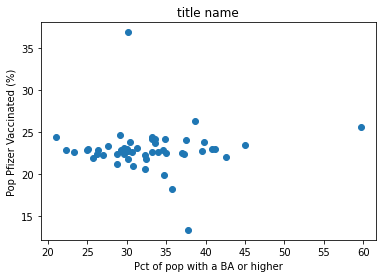

In [13]:
plt.scatter(full_join['Pct of pop with a BA or higher'], full_join['Pop Pfizer Vaccinated (%)'])
plt.title('title name')
plt.xlabel('Pct of pop with a BA or higher')
plt.ylabel('Pop Pfizer Vaccinated (%)')
plt.show()

In [14]:
Vax_BA = full_join[['State', 'Vax/BA']]
Vax_BA = Vax_BA.sort_values(by=['Vax/BA'], ascending=True)
Vax_BA

,State,Vax/BA
32,New York,35.36
8,District of Columbia,42.84
13,Illinois,51.06
5,Colorado,51.71
21,Massachusetts,52.27
30,New Jersey,55.90
20,Maryland,56.16
44,Utah,57.29
46,Virginia,57.49
6,Connecticut,59.84
